In [41]:
import sys
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import asyncio
import json
import async_await as aio
import nest_asyncio
from async_await import fetch_url
nest_asyncio.apply()

dtype_spec = {
    "Index": "int64",
    "User Id": "string",
    "First Name": "string",
    "Last Name": "string",
    "Sex": "category",           # limited values like Male/Female
    "Email": "string",
    "Phone": "string",
    "Job Title": "string"
}
data = pd.read_csv(
    "data/people-100000.csv",
    dtype=dtype_spec
)
data.columns = data.columns.str.strip()
data["Date of birth"] = pd.to_datetime(data["Date of birth"], errors="coerce")

print(data[['First Name', 'Last Name', 'Email']])

      First Name Last Name                        Email
0           Dawn   Trevino      clintongood@example.org
1           Dale  Mcknight   clairebradshaw@example.org
2        Herbert      Bean     johnnybooker@example.org
3          Karen   Everett            wkhan@example.org
4         Angela      Shea   reginaldgarner@example.com
...          ...       ...                          ...
99995    Eduardo   Fuentes  zacharygalloway@example.net
99996     Marcus  Ferguson            qkane@example.org
99997    Marilyn    Benson          jenny91@example.com
99998    Felicia   Robbins          imcneil@example.com
99999     Jackie     Doyle             emay@example.net

[100000 rows x 3 columns]


In [42]:
selected = data.iloc[:, 1:10]
females = selected[selected['Sex'] == 'Female']
mask = females["Date of birth"].dt.year <= 1910
# females.iloc[females["Date of birth"].dt.year <= 1910, 1] = 'Deceased'
females[mask].describe()

,Date of birth
count,2001
mean,1908-09-23 02:39:02.428785664
min,1906-05-31 00:00:00
25%,1907-07-27 00:00:00
50%,1908-09-20 00:00:00
75%,1909-11-11 00:00:00
max,1910-12-29 00:00:00


   CreditScore  Age  Tenure    Balance  EstimatedSalary
0          619   42       2       0.00        101348.88
1          608   41       1   83807.86        112542.58
2          502   42       8  159660.80        113931.57
3          699   39       1       0.00         93826.63
4          850   43       2  125510.82         79084.10


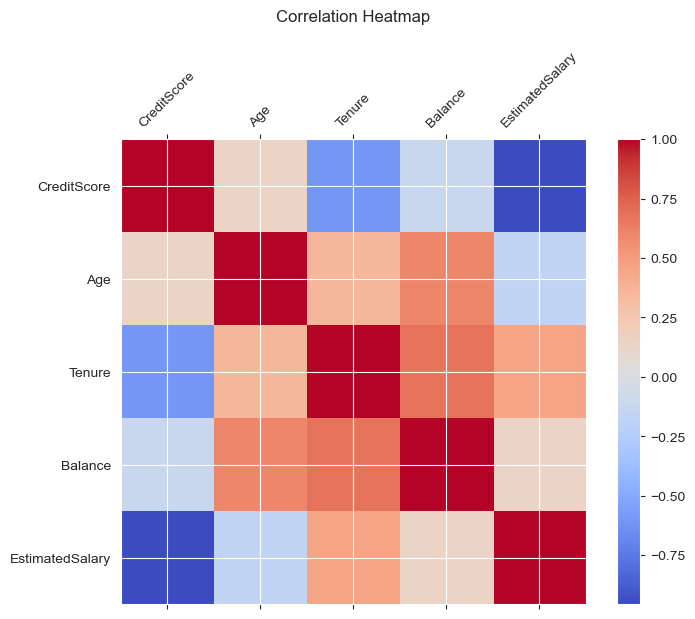

In [53]:
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/Customer_Churn_Modelling.csv'

remote_csv = pd.read_csv(url)
remote_csv.describe()
num_values = remote_csv.iloc[:, [3, 6, 7, 8, 12]]
print(num_values.head())
corr_matrix = num_values.head().corr()
plt.figure(figsize=(8,6))
plt.matshow(corr_matrix, fignum=1, cmap="coolwarm")  # 'coolwarm' color scale
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap", pad=20)
plt.show()